In [1]:
import RTBridge as rtb
import numpy as np
from functions import *
from scipy.signal import stft
import scipy.signal as signal
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
import wave
from sklearn.preprocessing import MinMaxScaler

In [2]:
sxx = spect_preprocessing('./www2.wav',6000)

activation = np.loadtxt('./Activations/Experiment_v0_03_activations.txt')
model = inverse_mapping_func(np.transpose(sxx),activation,0.1)

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/50


2023-05-03 17:01:56.077138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-03 17:01:56.077250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-05-03 17:01:56.178603: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-03 17:01:56.378085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 2s 6ms/step - loss: 0.6342 - mse: 0.0966 - val_loss: 0.5427 - val_mse: 0.0965
Epoch 2/50
 12/169 [=>............................] - ETA: 0s - loss: 0.5327 - mse: 0.0905

2023-05-03 17:01:57.709790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 1s 5ms/step - loss: 0.5123 - mse: 0.0907 - val_loss: 0.5051 - val_mse: 0.0912
Epoch 3/50
169/169 [==============================] - 1s 5ms/step - loss: 0.4929 - mse: 0.0866 - val_loss: 0.4961 - val_mse: 0.0883
Epoch 4/50
169/169 [==============================] - 1s 5ms/step - loss: 0.4851 - mse: 0.0840 - val_loss: 0.4874 - val_mse: 0.0854
Epoch 5/50
169/169 [==============================] - 1s 5ms/step - loss: 0.4765 - mse: 0.0808 - val_loss: 0.4764 - val_mse: 0.0815
Epoch 6/50
169/169 [==============================] - 1s 5ms/step - loss: 0.4663 - mse: 0.0767 - val_loss: 0.4642 - val_mse: 0.0766
Epoch 7/50
169/169 [==============================] - 1s 5ms/step - loss: 0.4558 - mse: 0.0722 - val_loss: 0.4520 - val_mse: 0.0714
Epoch 8/50
169/169 [==============================] - 1s 5ms/step - loss: 0.4452 - mse: 0.0676 - val_loss: 0.4398 - val_mse: 0.0662
Epoch 9/50
169/169 [==============================] - 1s 5ms/step - loss: 0.4349 - mse:

188/188 [==============================] - 0s 2ms/step


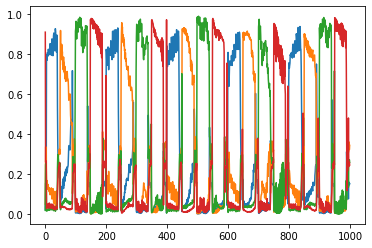

In [7]:
x = model.predict(np.transpose(sxx))
plt.plot(x[0:1000,:])

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


40/40 [==============================] - 0s 2ms/step


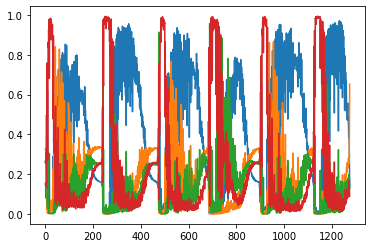

In [18]:
target_sxx = spect_preprocessing('./target2.wav',1275)
x = model.predict(np.transpose(target_sxx))
plt.plot(x)
np.savetxt('./train_activations/activation_2.txt',x)


In [19]:
x = np.loadtxt('./Activations/prescribed_activation.txt')

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_49148/1878782762.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read('./target_2.wav')


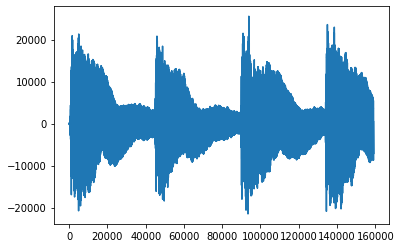

In [21]:
fs, music = wavfile.read('./target_2.wav')
music = music[:,1]
i1 = find_first_index(music)
i2 = find_last_index(music[i1:],i1,fs)
plt.plot(music[i1:i2])